# Setup environment

First import necessary packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import feature_selection

import preprocess as pp


sns.set()
%matplotlib inline

import os
os.makedirs("./images", exist_ok=True)
os.makedirs("./data", exist_ok=True)


# Preprocess data

Read raw data and add column names to it. 
DataFrame info displays some basic information about dataset. We can see that there are 3189 instances without NA objects

In [2]:
df = pp.splice_from_file("data/splice_orig.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3189 entries, 0 to 3188
Data columns (total 3 columns):
class    3189 non-null object
id       3189 non-null object
dna      3189 non-null object
dtypes: object(3)
memory usage: 74.8+ KB


DataFrame head functions show first couple of rows

In [3]:
df_split = pp.split_features(df)
df_split.head()

,class,dna_1,dna_2,dna_3,dna_4,dna_5,dna_6,dna_7,dna_8,dna_9,...,dna_51,dna_52,dna_53,dna_54,dna_55,dna_56,dna_57,dna_58,dna_59,dna_60
0,EI,A,G,A,C,C,C,G,C,C,...,G,T,G,C,C,C,C,C,G,C
1,EI,G,A,G,G,T,G,A,A,G,...,C,A,C,G,G,G,G,A,T,G
2,EI,G,G,G,C,T,G,C,G,T,...,G,G,T,T,T,T,C,C,C,C
3,EI,G,C,T,C,A,G,C,C,C,...,C,C,T,T,G,A,C,C,C,T
4,EI,C,A,G,A,C,T,G,G,G,...,G,A,G,A,C,C,A,C,A,G


Most of the values are A, C, T, G. Other values are in negligible quantities.

In [4]:
df_split_X, df_split_y = pp.separate_feature_class(df_split)
pp.count_unique_percent(df_split_X)

C    0.262784
G    0.262496
T    0.241967
A    0.232440
N    0.000293
D    0.000010
R    0.000005
S    0.000005
dtype: float64

In [5]:
odd_rows_dict = pp.get_odd_nucleotide_rows(df_split_X)
df_filt = pp.remove_odd_nucleotide_rows(df_split, odd_rows_dict)
df_filt_X, df_filt_y = pp.separate_feature_class(df_filt)

In [6]:
cols_dna = pp.get_split_col_names()
df_groupby_class = pd.get_dummies(df_filt, columns=cols_dna).groupby(['class']).sum(axis=0)

df_groupby_class.reset_index(level=0, inplace=True)
df_groupby_class.iloc[:, [0, 5, 6, 7, 8, 113, 114, 115, 116]]

,class,dna_2_A,dna_2_C,dna_2_G,dna_2_T,dna_29_A,dna_29_C,dna_29_G,dna_29_T
0,EI,176,229,195,161,443,106,113,99
1,IE,162,235,172,196,762,1,1,1
2,N,437,389,423,399,400,425,409,414


# Visual data information

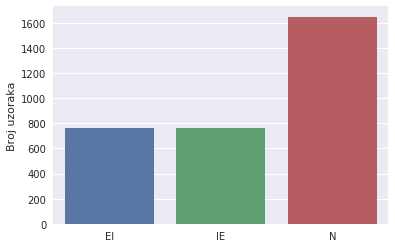

In [7]:
hue_order = df_filt['class'].unique()
ax = sns.countplot(x='class', data=df_filt, order=hue_order)
ax.set(xlabel='', ylabel='Broj uzoraka')
plt.savefig("images/dataset_class_dist.png")

In [8]:

df_train, df_test = model_selection.train_test_split(df_filt, test_size=0.2, stratify=df_filt['class'], random_state=22)

df_train.to_csv("data/splice_train.csv", index=False)
df_test.to_csv("data/splice_test.csv", index=False)
df_train.head()

,class,dna_1,dna_2,dna_3,dna_4,dna_5,dna_6,dna_7,dna_8,dna_9,...,dna_51,dna_52,dna_53,dna_54,dna_55,dna_56,dna_57,dna_58,dna_59,dna_60
718,EI,G,C,T,G,G,G,C,C,T,...,A,G,G,G,A,T,T,C,C,C
2861,N,G,C,T,T,G,A,T,G,T,...,C,T,T,T,C,T,C,C,A,A
2461,N,G,G,C,G,C,G,C,T,G,...,G,T,G,T,A,T,G,C,A,G
2321,N,T,C,A,T,A,A,A,A,C,...,G,A,C,A,A,G,G,T,C,T
1737,N,G,A,A,T,G,G,T,G,T,...,G,T,C,A,A,G,T,T,G,T


In [9]:
df_test.head()

,class,dna_1,dna_2,dna_3,dna_4,dna_5,dna_6,dna_7,dna_8,dna_9,...,dna_51,dna_52,dna_53,dna_54,dna_55,dna_56,dna_57,dna_58,dna_59,dna_60
3084,N,C,A,C,T,T,G,A,G,C,...,C,A,T,T,T,C,A,A,C,C
2388,N,C,C,T,T,T,T,C,T,T,...,G,C,T,C,T,G,C,T,T,C
2855,N,C,C,T,C,C,C,C,C,T,...,T,G,G,C,C,A,T,C,C,C
2901,N,A,G,G,A,A,G,G,G,G,...,C,G,A,G,G,T,C,T,G,G
2717,N,A,G,A,C,T,G,G,A,A,...,A,G,C,A,T,G,T,T,T,T


TypeError: integer argument expected, got float

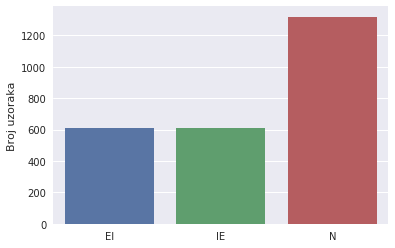

In [10]:
ax = sns.countplot(x='class', data=df_train, order = hue_order)
ax.set(xlabel='', ylabel='Broj uzoraka')
plt.savefig("images/trainset_class_dist.jpg")

TypeError: integer argument expected, got float

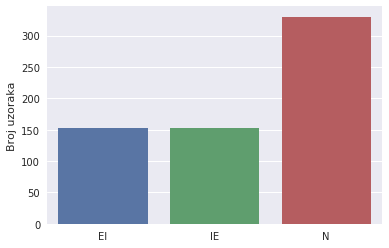

In [11]:
ax = sns.countplot(x='class', data=df_test, order=hue_order)
ax.set(xlabel='', ylabel='Broj uzoraka')
plt.savefig("images/testset_class_dist.jpg")

[Text(0,0.5,'Broj uzoraka'), Text(0.5,0,'')]

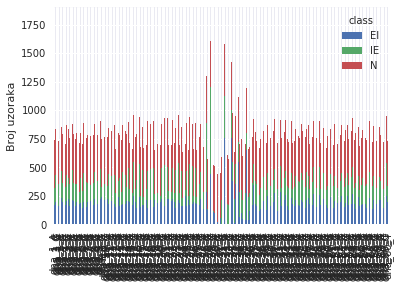

In [12]:
ax = df_groupby_class.set_index('class').T.plot(kind='bar', stacked=True)
ax.set(xlabel='', ylabel='Broj uzoraka')

In [13]:
plt.savefig("images/nucleotids_byclass.jpg")

TypeError: integer argument expected, got float

# Weka attribute selection

In [14]:
chi2_attributes = []
with open("data/chi2_attributes.txt") as f:
    for line in f:
        res = "".join(word for word in line.strip().split(' ') if word.startswith('dna_'))
        if res:
            chi2_attributes.append(res)
        
print(chi2_attributes)
        

['dna_30', 'dna_29', 'dna_32', 'dna_31', 'dna_35', 'dna_28', 'dna_34', 'dna_33', 'dna_25', 'dna_26', 'dna_24', 'dna_20', 'dna_23', 'dna_21', 'dna_22', 'dna_19', 'dna_18', 'dna_16', 'dna_17', 'dna_15', 'dna_36', 'dna_13', 'dna_10', 'dna_9', 'dna_14', 'dna_12', 'dna_41', 'dna_6', 'dna_5', 'dna_46', 'dna_60', 'dna_54', 'dna_55', 'dna_37', 'dna_47', 'dna_11', 'dna_43', 'dna_4', 'dna_40', 'dna_58', 'dna_38', 'dna_50', 'dna_49', 'dna_48', 'dna_7', 'dna_39', 'dna_2', 'dna_42', 'dna_1', 'dna_56', 'dna_8', 'dna_45', 'dna_27', 'dna_44', 'dna_52', 'dna_59', 'dna_51', 'dna_57', 'dna_3', 'dna_53']


[(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60), (12, 14, 2, 23, 32, 33, 16, 10, 37, 38, 25, 35, 39, 36, 41, 43, 42, 44, 45, 49, 47, 46, 48, 50, 52, 51, 8, 55, 59, 60, 57, 58, 53, 54, 56, 40, 27, 20, 15, 22, 34, 13, 24, 7, 9, 31, 26, 17, 18, 19, 4, 6, 1, 29, 28, 11, 3, 21, 5, 30)]


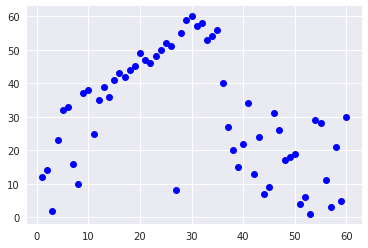

In [15]:
chi2_attr_idx = [int(word[4:]) for word in chi2_attributes]
zipped = zip (chi2_attr_idx, list(range(len(chi2_attributes),0,-1)))
zipped = sorted(zipped, key=lambda x: x[0])
unzip = list(zip(*zipped))
print(list(unzip))

plt.figure
plt.plot(unzip[0], unzip[1], 'bo')

In [16]:
def attribute_selection(df_train, df_test, attributes, N):
    attr_slice = attributes[0:N]
    attr_slice.append('class')
    return df_train[attr_slice], df_test[attr_slice]

In [19]:
top10_chi2_train, top10_chi2_test = attribute_selection(df_train, df_test, chi2_attributes, 10)
top20_chi2_train, top20_chi2_test = attribute_selection(df_train, df_test, chi2_attributes, 20)

In [21]:
top10_chi2_train.to_csv("data/top10_ch2_train.csv", index=False)
top10_chi2_test.to_csv("data/top10_ch2_test.csv", index=False)
top20_chi2_train.to_csv("data/top20_ch2_train.csv", index=False)
top20_chi2_test.to_csv("data/top20_ch2_test.csv", index=False)

In [22]:
mp_attributes = []
with open("data/mp_attributes.txt") as f:
    for line in f:
        res = "".join(word for word in line.strip().split(' ') if word.startswith('dna_'))
        if res:
            mp_attributes.append(res)

In [23]:
print(mp_attributes)

['dna_5', 'dna_11', 'dna_21', 'dna_28', 'dna_29', 'dna_30', 'dna_31', 'dna_32', 'dna_33', 'dna_35', 'dna_38', 'dna_44', 'dna_48']


In [24]:
mp_train, mp_test = attribute_selection(df_train, df_test, mp_attributes, len(mp_attributes))

In [25]:
mp_train.to_csv("data/mp_train.csv", index=False)
mp_test.to_csv("data/mp_test.csv", index=False)